for just 5 epochs

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:00<00:00, 47.2MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.63MB/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:00<00:00, 13.0MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.44MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



MLP Accuracy: 0.5621
torch.Size([64, 20])
torch.Size([64, 20])
torch.Size([64, 20])
torch.Size([64, 20])
torch.Size([64, 20])
torch.Size([64, 20])
torch.Size([64, 20])
torch.Size([64, 20])
torch.Size([64, 20])
torch.Size([64, 20])
torch.Size([64, 20])
torch.Size([64, 20])
torch.Size([64, 20])
torch.Size([64, 20])
torch.Size([64, 20])
torch.Size([64, 20])
torch.Size([64, 20])
torch.Size([64, 20])
torch.Size([64, 20])
torch.Size([64, 20])
torch.Size([64, 20])
torch.Size([64, 20])
torch.Size([64, 20])
torch.Size([64, 20])
torch.Size([64, 20])
torch.Size([64, 20])
torch.Size([64, 20])
torch.Size([64, 20])
torch.Size([64, 20])
torch.Size([64, 20])
torch.Size([64, 20])
torch.Size([64, 20])
torch.Size([64, 20])
torch.Size([64, 20])
torch.Size([64, 20])
torch.Size([64, 20])
torch.Size([64, 20])
torch.Size([64, 20])
torch.Size([64, 20])
torch.Size([64, 20])
torch.Size([64, 20])
torch.Size([64, 20])
torch.Size([64, 20])
torch.Size([64, 20])
torch.Size([64, 20])
torch.Size([64, 20])
torch.Size([6

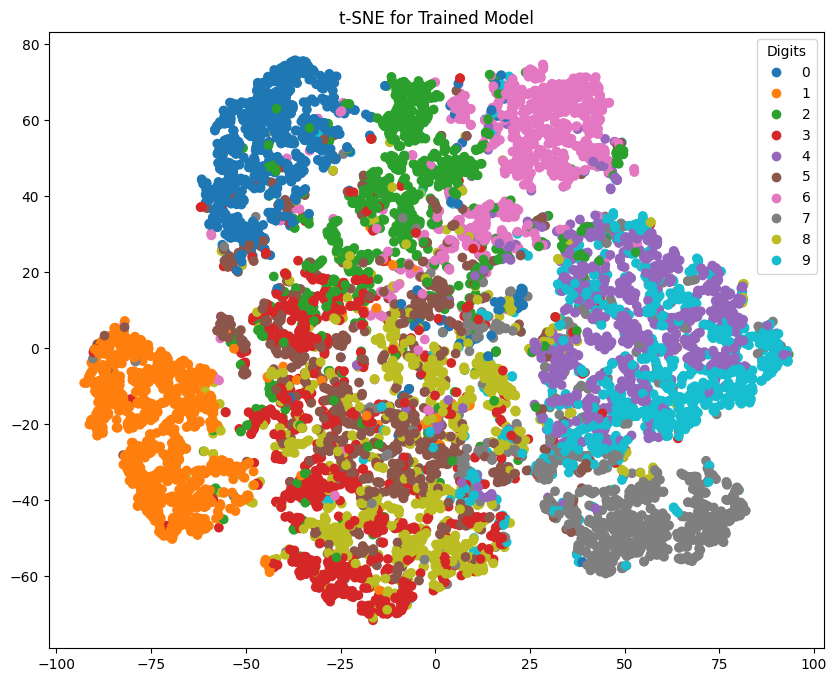

'untrained_model = MLP()  # untrained model\nuntrained_hidden, _ = get_hidden_representations(untrained_model, testloader)\nplot_tsne(untrained_hidden.numpy(), labels.numpy(), \'t-SNE for Untrained Model\')\n\n# Prepare data for Random Forest and Logistic Regression\nX_train = trainset.data.numpy().reshape(len(trainset), -1)\ny_train = trainset.targets.numpy()\nX_test = testset.data.numpy().reshape(len(testset), -1)\ny_test = testset.targets.numpy()\n\n# Random Forest\nrf_model = RandomForestClassifier(random_state=0)\nrf_model.fit(X_train, y_train)\nrf_predictions = rf_model.predict(X_test)\n\n# Logistic Regression\nlr_model = LogisticRegression(random_state=0, max_iter=1000)\nlr_model.fit(X_train, y_train)\nlr_predictions = lr_model.predict(X_test)\n\n# Calculate F1-score\nmlp_f1 = f1_score(y_test, mlp_predictions, average=\'weighted\')\nrf_f1 = f1_score(y_test, rf_predictions, average=\'weighted\')\nlr_f1 = f1_score(y_test, lr_predictions, average=\'weighted\')\n\n# Print F1-scores\

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.manifold import TSNE

# 1. Load the MNIST dataset
transform = transforms.ToTensor()
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# 2. Define the MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 30)
        self.fc2 = nn.Linear(30, 20)
        self.fc3 = nn.Linear(20, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the image
        x = torch.relu(self.fc1(x))
        x_hidden = torch.relu(self.fc2(x))
        output = self.fc3(x_hidden)
        return output, x_hidden

# 3. Instantiate the model and optimizer
model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# 4. Training the MLP
def train(model, trainloader, optimizer, criterion, epochs=5):
    model.train()
    for epoch in range(epochs):
        for inputs, labels in trainloader:
            optimizer.zero_grad()
            outputs, _ = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

train(model, trainloader, optimizer, criterion, epochs=5)

# 5. Calculate MLP accuracy on test set
mlp_correct = 0
mlp_total = 0
mlp_predictions = []
with torch.no_grad():
    for inputs, labels in testloader:
        outputs, _ = model(inputs)
        _, predicted = torch.max(outputs, 1)
        mlp_predictions.extend(predicted.numpy())
        mlp_total += labels.size(0)
        mlp_correct += (predicted == labels).sum().item()

mlp_accuracy = mlp_correct / mlp_total
print(f"MLP Accuracy: {mlp_accuracy}")

# 6. Get the hidden layer output for t-SNE from the trained model
def get_hidden_representations(model, dataloader):
    model.eval()
    hidden_reps = []
    labels_list = []
    with torch.no_grad():
        for inputs, labels in dataloader:
            _, hidden_output = model(inputs)
            print(hidden_output.shape)
            hidden_reps.append(hidden_output)
            labels_list.append(labels)
    return torch.cat(hidden_reps), torch.cat(labels_list)

# Get hidden representations
trained_hidden, labels = get_hidden_representations(model, testloader)

# 7. t-SNE visualization
def plot_tsne(hidden_representations, labels, title):
    tsne = TSNE(n_components=2, random_state=0)
    tsne_result = tsne.fit_transform(hidden_representations)
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='tab10')
    plt.legend(*scatter.legend_elements(), title="Digits")
    plt.title(title)
    plt.show()

# Plot t-SNE for trained model
plot_tsne(trained_hidden.numpy(), labels.numpy(), 't-SNE for Trained Model')

# 8. t-SNE for untrained model
# Instantiate a new untrained model and get hidden representations
'''untrained_model = MLP()  # untrained model
untrained_hidden, _ = get_hidden_representations(untrained_model, testloader)
plot_tsne(untrained_hidden.numpy(), labels.numpy(), 't-SNE for Untrained Model')




for 50 epochs

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:00<00:00, 41.5MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.20MB/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:00<00:00, 11.0MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 5.06MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



MLP Accuracy: 0.9102


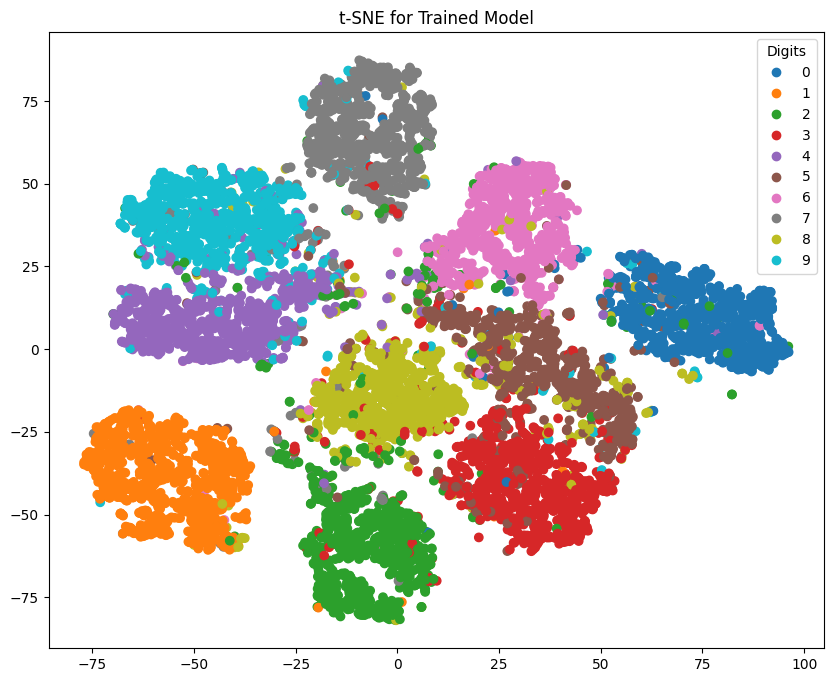

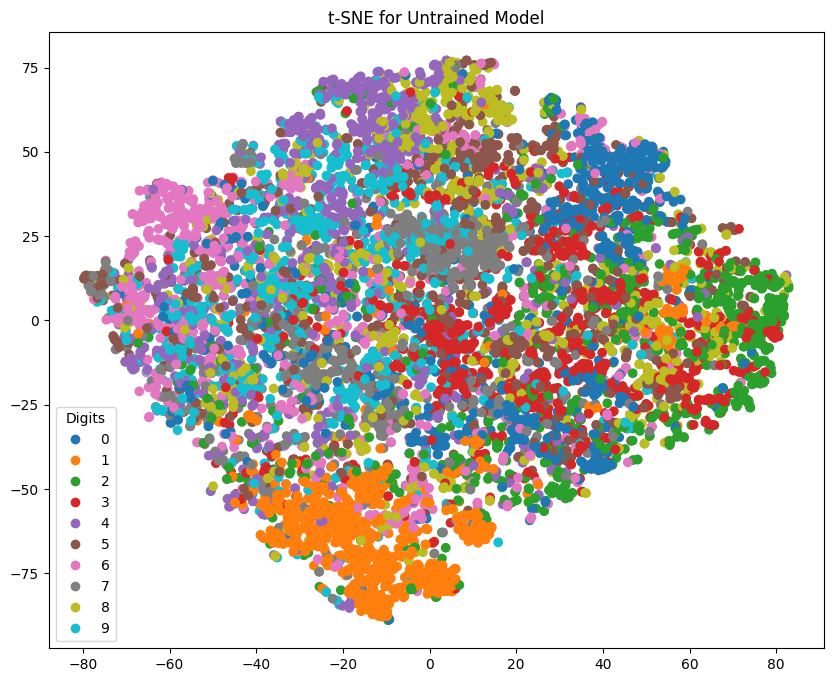

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 1. Load the MNIST dataset
transform = transforms.ToTensor()
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# 2. Define the MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 30)
        self.fc2 = nn.Linear(30, 20)
        self.fc3 = nn.Linear(20, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the image
        x = torch.relu(self.fc1(x))
        x_hidden = torch.relu(self.fc2(x))
        output = self.fc3(x_hidden)
        return output, x_hidden

# 3. Instantiate the model and optimizer
model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# 4. Training the MLP
def train(model, trainloader, optimizer, criterion, epochs=50):
    model.train()
    for epoch in range(epochs):
        for inputs, labels in trainloader:
            optimizer.zero_grad()
            outputs, _ = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

train(model, trainloader, optimizer, criterion, epochs=50)
mlp_correct = 0
mlp_total = 0
mlp_predictions = []
with torch.no_grad():
    for inputs, labels in testloader:
        outputs, _ = model(inputs)
        _, predicted = torch.max(outputs, 1)
        mlp_predictions.extend(predicted.numpy())
        mlp_total += labels.size(0)
        mlp_correct += (predicted == labels).sum().item()

mlp_accuracy = mlp_correct / mlp_total
print(f"MLP Accuracy: {mlp_accuracy}")

# 5. Get the hidden layer output for t-SNE from the trained model
def get_hidden_representations(model, dataloader):
    model.eval()
    hidden_reps = []
    labels_list = []
    with torch.no_grad():
        for inputs, labels in dataloader:
            _, hidden_output = model(inputs)
            hidden_reps.append(hidden_output)
            labels_list.append(labels)
    return torch.cat(hidden_reps), torch.cat(labels_list)

# Get hidden representations
trained_hidden, labels = get_hidden_representations(model, testloader)

# 6. t-SNE visualization
def plot_tsne(hidden_representations, labels, title):
    tsne = TSNE(n_components=2, random_state=0)
    tsne_result = tsne.fit_transform(hidden_representations)
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='tab10')
    plt.legend(*scatter.legend_elements(), title="Digits")
    plt.title(title)
    plt.show()

# Plot t-SNE for trained model
plot_tsne(trained_hidden.numpy(), labels.numpy(), 't-SNE for Trained Model')

# 7. t-SNE for untrained model
# Instantiate a new untrained model and get hidden representations
untrained_model = MLP()  # untrained model
untrained_hidden, _ = get_hidden_representations(untrained_model, testloader)
plot_tsne(untrained_hidden.numpy(), labels.numpy(), 't-SNE for Untrained Model')


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
transform = transforms.ToTensor()
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

In [ ]:
X_train = trainset.data.numpy().reshape(len(trainset), -1)
y_train = trainset.targets.numpy()
X_test = testset.data.numpy().reshape(len(testset), -1)
y_test = testset.targets.numpy()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MLP F1-score: 0.9620652999563952
Random Forest F1-score: 0.9704818018550608
Logistic Regression F1-score: 0.9202798430633382


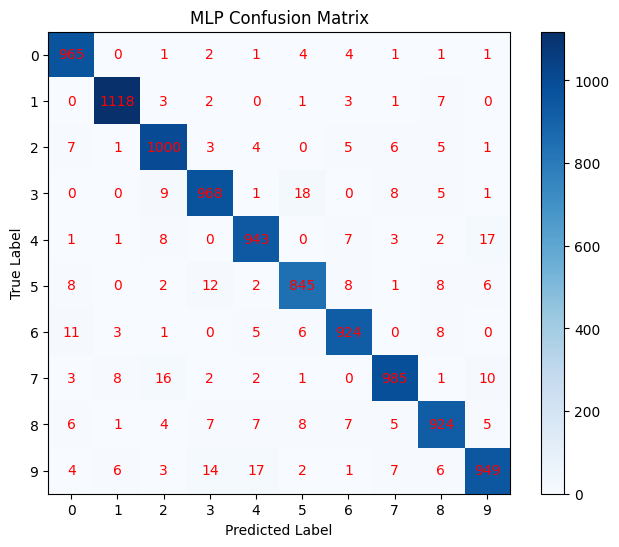

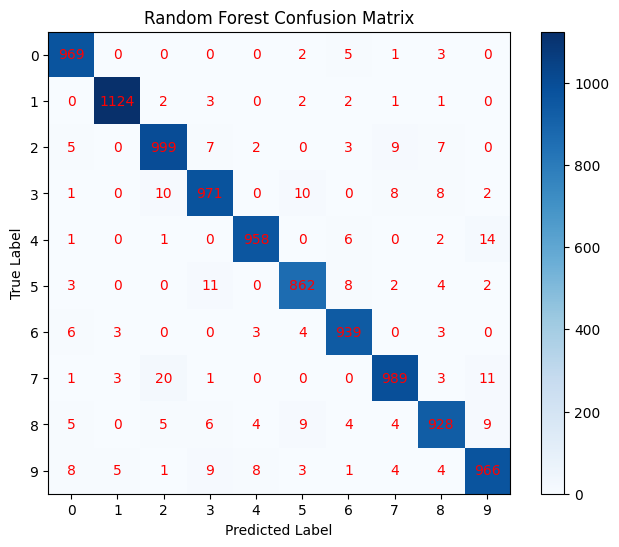

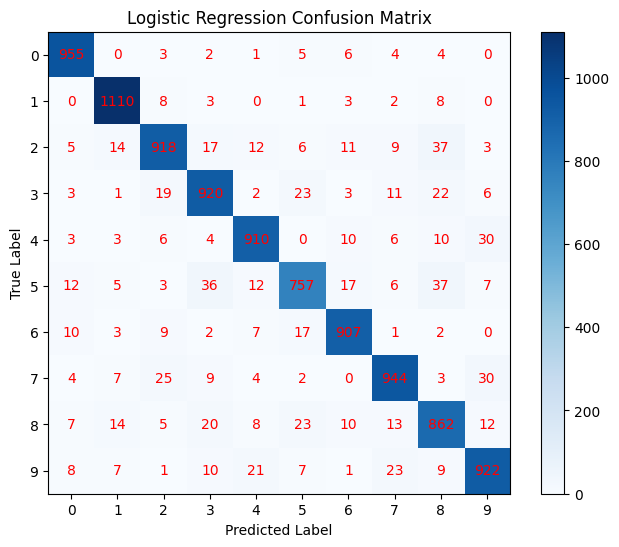

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score
from torch.utils.data import DataLoader

# MLP Model predictions (assuming testloader and model are defined)
mlp_predictions = []
with torch.no_grad():
    for inputs, labels in testloader:
        outputs, _ = model(inputs)
        _, predicted = torch.max(outputs, 1)
        mlp_predictions.extend(predicted.numpy())

# Random Forest Model
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Logistic Regression Model
lr_model = LogisticRegression(random_state=0, max_iter=1000)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Calculate F1-scores
mlp_f1 = f1_score(y_test, mlp_predictions, average='weighted')
rf_f1 = f1_score(y_test, rf_predictions, average='weighted')
lr_f1 = f1_score(y_test, lr_predictions, average='weighted')

# Print F1-scores
print(f"MLP F1-score: {mlp_f1}")
print(f"Random Forest F1-score: {rf_f1}")
print(f"Logistic Regression F1-score: {lr_f1}")

# Function to plot confusion matrix with sample counts in each cell
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(np.unique(y_true)))
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Adding text annotations in each cell
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, f'{cm[i, j]}', ha='center', va='center', color='red')

    plt.show()

# Plotting confusion matrices for each model
plot_confusion_matrix(y_test, mlp_predictions, 'MLP Confusion Matrix')
plot_confusion_matrix(y_test, rf_predictions, 'Random Forest Confusion Matrix')
plot_confusion_matrix(y_test, lr_predictions, 'Logistic Regression Confusion Matrix')


tuning hyperparameters lr=0.001 and epoch =200

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:00<00:00, 39843399.90it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 1063704.16it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:00<00:00, 10244490.16it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 13174639.54it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

MLP Accuracy: 0.9482


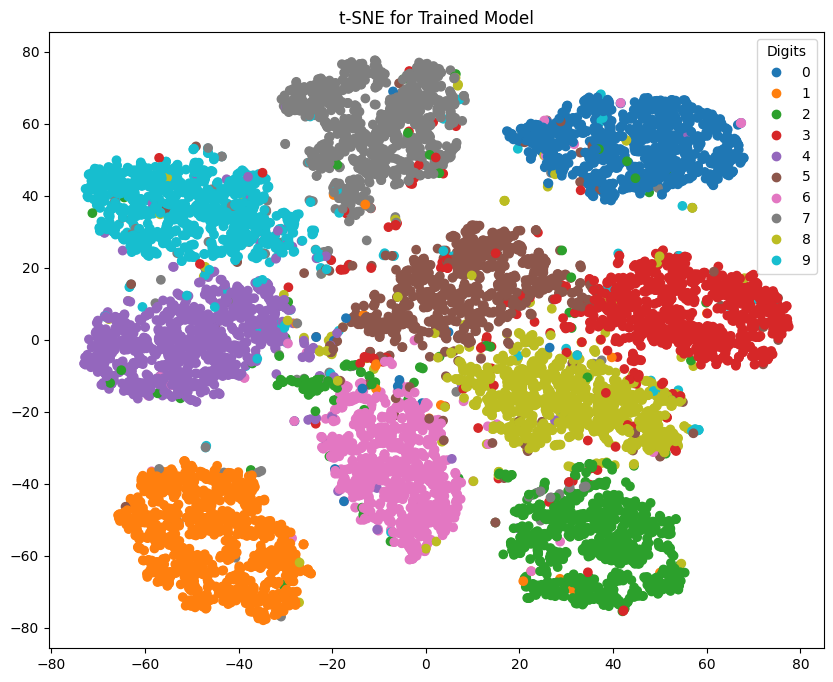

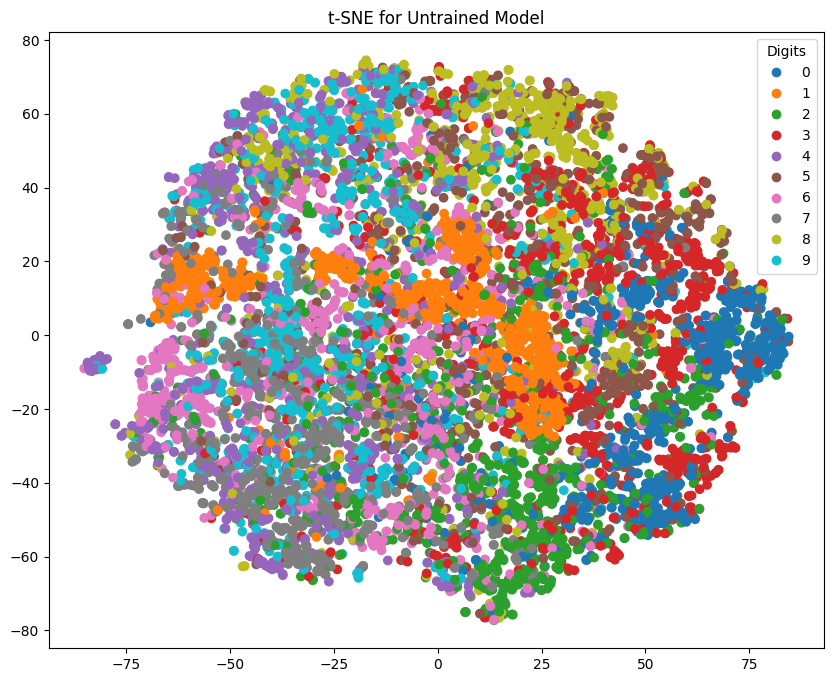

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MLP F1-score: 0.9481504576000181
Random Forest F1-score: 0.9704818018550608
Logistic Regression F1-score: 0.9202798430633382


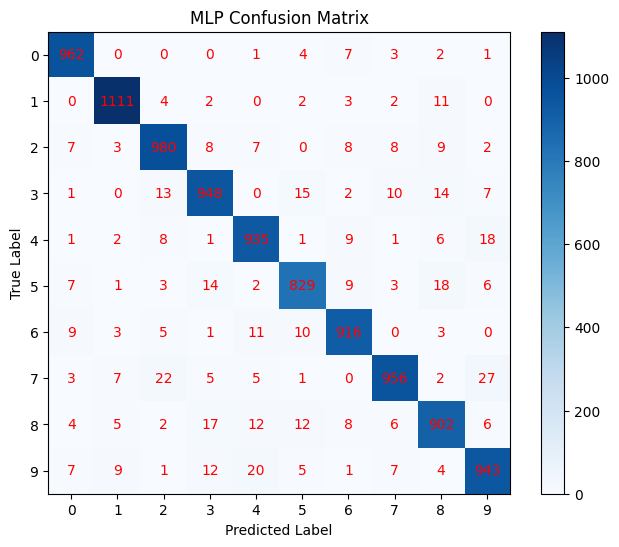

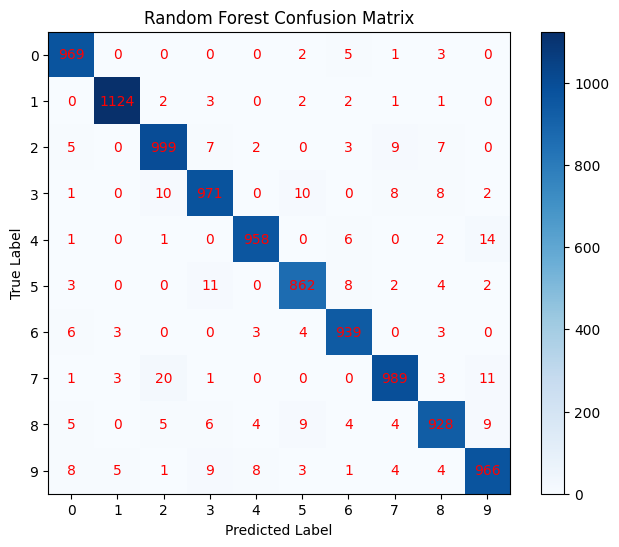

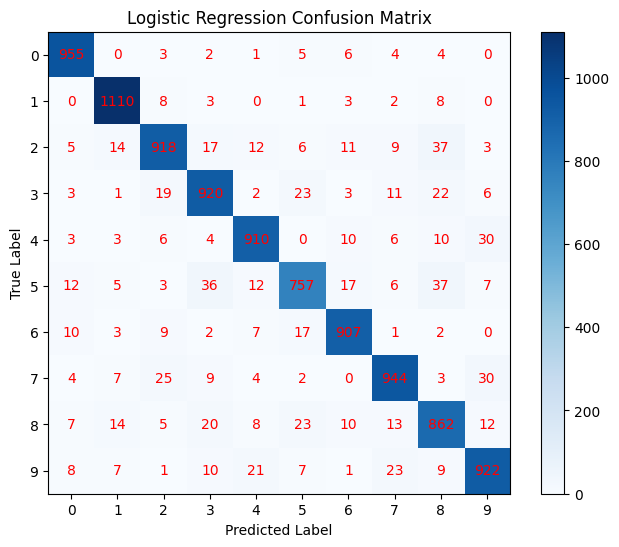

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.manifold import TSNE

# 1. Load the MNIST dataset
transform = transforms.ToTensor()
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# 2. Define the MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 30)
        self.fc2 = nn.Linear(30, 20)
        self.fc3 = nn.Linear(20, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the image
        x = torch.relu(self.fc1(x))
        x_hidden = torch.relu(self.fc2(x))
        output = self.fc3(x_hidden)
        return output, x_hidden

# 3. Instantiate the model and optimizer
model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# 4. Training the MLP
def train(model, trainloader, optimizer, criterion, epochs=200):
    model.train()
    for epoch in range(epochs):
        for inputs, labels in trainloader:
            optimizer.zero_grad()
            outputs, _ = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

train(model, trainloader, optimizer, criterion, epochs=200)

# 5. Calculate MLP accuracy on test set
mlp_correct = 0
mlp_total = 0
mlp_predictions = []
with torch.no_grad():
    for inputs, labels in testloader:
        outputs, _ = model(inputs)
        _, predicted = torch.max(outputs, 1)
        mlp_predictions.extend(predicted.numpy())
        mlp_total += labels.size(0)
        mlp_correct += (predicted == labels).sum().item()

mlp_accuracy = mlp_correct / mlp_total
print(f"MLP Accuracy: {mlp_accuracy}")

# 6. Get the hidden layer output for t-SNE from the trained model
def get_hidden_representations(model, dataloader):
    model.eval()
    hidden_reps = []
    labels_list = []
    with torch.no_grad():
        for inputs, labels in dataloader:
            _, hidden_output = model(inputs)
            hidden_reps.append(hidden_output)
            labels_list.append(labels)
    return torch.cat(hidden_reps), torch.cat(labels_list)

# Get hidden representations
trained_hidden, labels = get_hidden_representations(model, testloader)

# 7. t-SNE visualization
def plot_tsne(hidden_representations, labels, title):
    tsne = TSNE(n_components=2, random_state=0)
    tsne_result = tsne.fit_transform(hidden_representations)
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='tab10')
    plt.legend(*scatter.legend_elements(), title="Digits")
    plt.title(title)
    plt.show()

# Plot t-SNE for trained model
plot_tsne(trained_hidden.numpy(), labels.numpy(), 't-SNE for Trained Model')

# 8. t-SNE for untrained model
# Instantiate a new untrained model and get hidden representations
untrained_model = MLP()  # untrained model
untrained_hidden, _ = get_hidden_representations(untrained_model, testloader)
plot_tsne(untrained_hidden.numpy(), labels.numpy(), 't-SNE for Untrained Model')

# Prepare data for Random Forest and Logistic Regression
X_train = trainset.data.numpy().reshape(len(trainset), -1)
y_train = trainset.targets.numpy()
X_test = testset.data.numpy().reshape(len(testset), -1)
y_test = testset.targets.numpy()

# Random Forest
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Logistic Regression
lr_model = LogisticRegression(random_state=0, max_iter=1000)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Calculate F1-score
mlp_f1 = f1_score(y_test, mlp_predictions, average='weighted')
rf_f1 = f1_score(y_test, rf_predictions, average='weighted')
lr_f1 = f1_score(y_test, lr_predictions, average='weighted')

# Print F1-scores
print(f"MLP F1-score: {mlp_f1}")
print(f"Random Forest F1-score: {rf_f1}")
print(f"Logistic Regression F1-score: {lr_f1}")

# 9. Calculate and plot confusion matrices with sample counts in each cell
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(np.unique(y_true)))
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Adding text annotations in each cell
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, f'{cm[i, j]}', ha='center', va='center', color='red')

    plt.show()

# Plotting confusion matrices for each model
plot_confusion_matrix(y_test, mlp_predictions, 'MLP Confusion Matrix')
plot_confusion_matrix(y_test, rf_predictions, 'Random Forest Confusion Matrix')
plot_confusion_matrix(y_test, lr_predictions, 'Logistic Regression Confusion Matrix')


Epoch 1/50, F1 Score: 0.0433
Epoch 2/50, F1 Score: 0.0856
Epoch 3/50, F1 Score: 0.2150
Epoch 4/50, F1 Score: 0.2825
Epoch 5/50, F1 Score: 0.3100
Epoch 6/50, F1 Score: 0.4143
Epoch 7/50, F1 Score: 0.5312
Epoch 8/50, F1 Score: 0.6245
Epoch 9/50, F1 Score: 0.6914
Epoch 10/50, F1 Score: 0.7305
Epoch 11/50, F1 Score: 0.7518
Epoch 12/50, F1 Score: 0.7744
Epoch 13/50, F1 Score: 0.7913
Epoch 14/50, F1 Score: 0.8051
Epoch 15/50, F1 Score: 0.8222
Epoch 16/50, F1 Score: 0.8302
Epoch 17/50, F1 Score: 0.8412
Epoch 18/50, F1 Score: 0.8487
Epoch 19/50, F1 Score: 0.8556
Epoch 20/50, F1 Score: 0.8626
Epoch 21/50, F1 Score: 0.8676
Epoch 22/50, F1 Score: 0.8720
Epoch 23/50, F1 Score: 0.8759
Epoch 24/50, F1 Score: 0.8772
Epoch 25/50, F1 Score: 0.8808
Epoch 26/50, F1 Score: 0.8839
Epoch 27/50, F1 Score: 0.8857
Epoch 28/50, F1 Score: 0.8873
Epoch 29/50, F1 Score: 0.8890
Epoch 30/50, F1 Score: 0.8908
Epoch 31/50, F1 Score: 0.8923
Epoch 32/50, F1 Score: 0.8925
Epoch 33/50, F1 Score: 0.8935
Epoch 34/50, F1 Sco

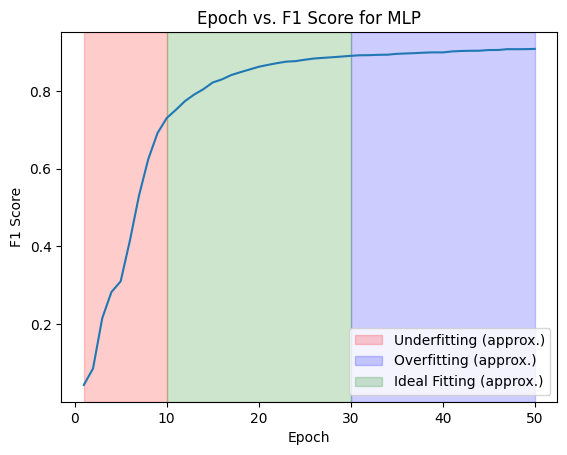

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import numpy as np

# 1. Load the MNIST dataset
transform = transforms.ToTensor()
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# 2. Define the MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 30)
        self.fc2 = nn.Linear(30, 20)
        self.fc3 = nn.Linear(20, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the image
        x = torch.relu(self.fc1(x))
        x_hidden = torch.relu(self.fc2(x))
        output = self.fc3(x_hidden)
        return output, x_hidden

# 3. Instantiate the model, optimizer, and loss function
model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)  # You can adjust the learning rate

# 4. Training and evaluation function
def train_and_evaluate(model, trainloader, testloader, optimizer, criterion, epochs):
    f1_scores = []
    model.train()
    for epoch in range(epochs):
        for inputs, labels in trainloader:
            optimizer.zero_grad()
            outputs, _ = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        # Evaluate on test set after each epoch
        model.eval()
        predictions = []
        true_labels = []
        with torch.no_grad():
            for inputs, labels in testloader:
                outputs, _ = model(inputs)
                _, predicted = torch.max(outputs, 1)
                predictions.extend(predicted.numpy())
                true_labels.extend(labels.numpy())

        f1 = f1_score(true_labels, predictions, average='weighted')
        f1_scores.append(f1)
        print(f"Epoch {epoch + 1}/{epochs}, F1 Score: {f1:.4f}")

    return f1_scores

# 5. Train and evaluate the model
epochs = 50  # Adjust the number of epochs as needed
f1_scores = train_and_evaluate(model, trainloader, testloader, optimizer, criterion, epochs)

# 6. Plot epoch vs. F1 score
plt.plot(range(1, epochs + 1), f1_scores)
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.title('Epoch vs. F1 Score for MLP')

# 7. Approximate regions for underfitting, overfitting, and ideal fitting
# (Adjust these based on the actual plot)
plt.axvspan(1, 10, alpha=0.2, color='red', label='Underfitting (approx.)')
plt.axvspan(30, epochs, alpha=0.2, color='blue', label='Overfitting (approx.)')
plt.axvspan(10, 30, alpha=0.2, color='green', label='Ideal Fitting (approx.)')

plt.legend()
plt.show()

performance:Random forest>MLP>Logistic regression



comomly confused digits are: (7,9),(4,9),(5,3),(7,2),(0,6,8)

In the t-SNE plot for the **trained model**, we observe distinct clusters corresponding to the 10 digits. This indicates that the network has learned to represent different digits with distinct patterns of activation in the 20-neuron layer.


While the t-SNE plot for the **untrained model** would likely show a more random or overlapping of numbers distribution as because the untrained network has not yet learned meaningful representations for the digits, and the activations in the 20-neuron layer are essentially random.

fashion mnist


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
transform = transforms.ToTensor()
fashion_mnist_testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
fashion_mnist_testloader = torch.utils.data.DataLoader(fashion_mnist_testset, batch_size=64, shuffle=False)

100%|██████████| 26.4M/26.4M [00:04<00:00, 6.29MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 268kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 4.95MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 8.94MB/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:
fashion_mnist_predictions = []
with torch.no_grad():
    for inputs, labels in fashion_mnist_testloader:
        outputs, _ = model(inputs)  # Use the trained MLP model
        _, predicted = torch.max(outputs, 1)
        fashion_mnist_predictions.extend(predicted.numpy())

In [ ]:
fashion_mnist_hidden, fashion_mnist_labels = get_hidden_representations(model, fashion_mnist_testloader)  # Use the trained MLP model

The Fashion MNIST dataset uses digits to represent different clothing items:

0: T-shirt/top

1: Trouser

2: Pullover

3: Dress

4: Coat

5: Sandal

6: Shirt

7: Sneaker

8: Bag

9: Ankle boot

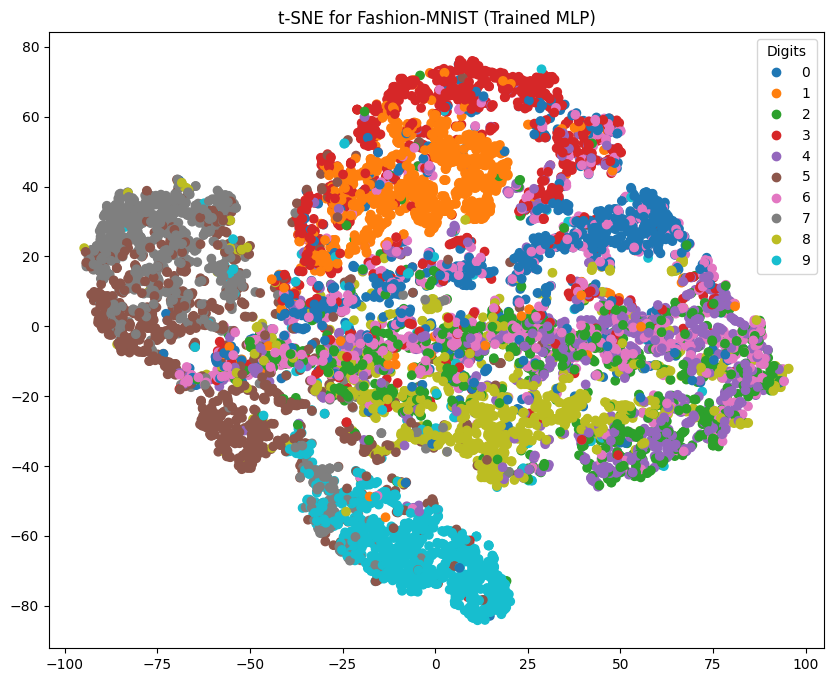

In [ ]:
plot_tsne(fashion_mnist_hidden.numpy(), fashion_mnist_labels.numpy(), 't-SNE for Fashion-MNIST (Trained MLP)')

MNIST Accuracy: 0.9380
MNIST F1 Score: 0.9379


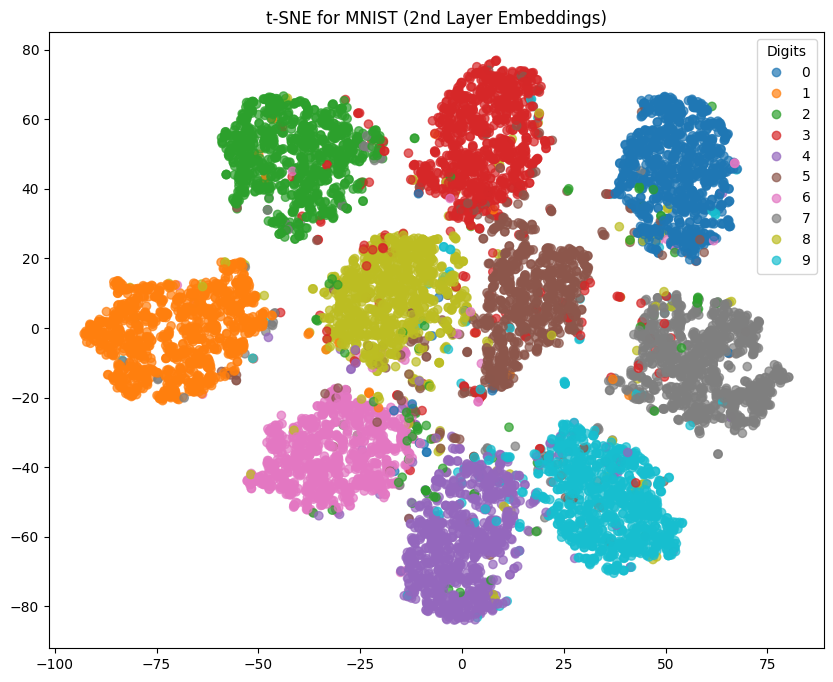

Fashion-MNIST Accuracy: 0.0969
Fashion-MNIST F1 Score: 0.0602


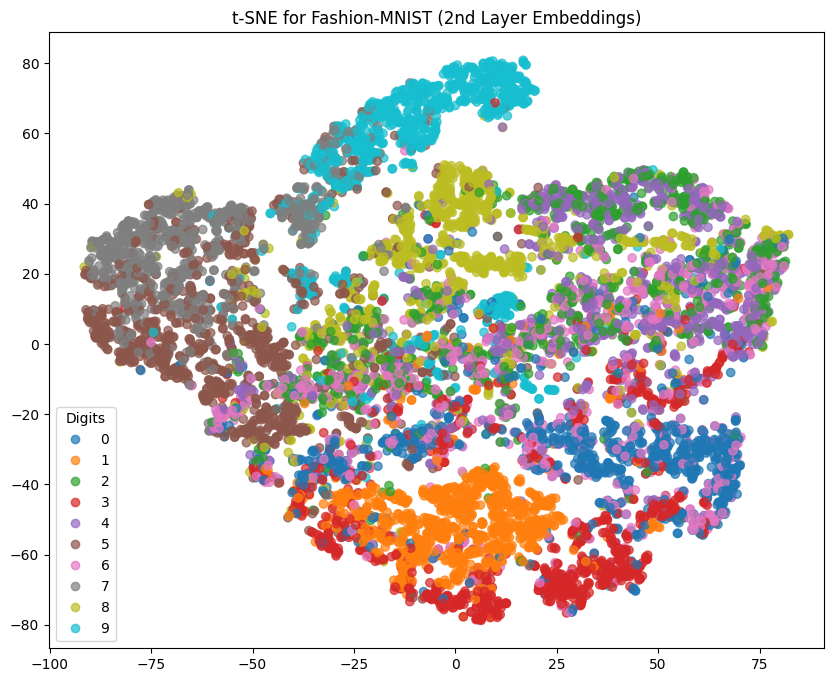

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, f1_score

# Set up device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 1. Load the MNIST and Fashion-MNIST datasets
transform = transforms.ToTensor()

# Load MNIST dataset
mnist_trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
mnist_trainloader = torch.utils.data.DataLoader(mnist_trainset, batch_size=64, shuffle=True)
mnist_testloader = torch.utils.data.DataLoader(mnist_testset, batch_size=64, shuffle=False)

# Load Fashion-MNIST dataset
fashion_testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
fashion_testloader = torch.utils.data.DataLoader(fashion_testset, batch_size=64, shuffle=False)

# 2. Define the MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 30)
        self.fc2 = nn.Linear(30, 50)
        self.fc3 = nn.Linear(50, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the image
        x = torch.relu(self.fc1(x))
        x_hidden = torch.relu(self.fc2(x))  # Second layer output for t-SNE
        output = self.fc3(x_hidden)
        return output, x_hidden

# 3. Instantiate the model, define loss and optimizer
model = MLP().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 4. Train the model on MNIST
def train(model, trainloader, optimizer, criterion, epochs=15):
    model.train()
    for epoch in range(epochs):
        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs, _ = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

train(model, mnist_trainloader, optimizer, criterion, epochs=15)

# 5. Function to evaluate model and calculate accuracy and F1-score
def evaluate_model(model, dataloader, title):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            outputs, _ = model(inputs)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.numpy())

    # Calculate accuracy and F1-score
    accuracy = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average='weighted')
    print(f"{title} Accuracy: {accuracy:.4f}")
    print(f"{title} F1 Score: {f1:.4f}")
    return all_preds, all_labels

# Evaluate on MNIST
mnist_preds, mnist_labels = evaluate_model(model, mnist_testloader, "MNIST")

# 6. Extract hidden layer representations for MNIST for t-SNE visualization
def get_hidden_representations(model, dataloader):
    model.eval()
    hidden_reps = []
    labels_list = []
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            _, hidden_output = model(inputs)
            hidden_reps.append(hidden_output.cpu())
            labels_list.append(labels)
    return torch.cat(hidden_reps), torch.cat(labels_list)

# Get MNIST hidden representations
mnist_hidden, mnist_labels = get_hidden_representations(model, mnist_testloader)

# 7. Plot t-SNE for MNIST second layer embeddings
def plot_tsne(hidden_representations, labels, title):
    tsne = TSNE(n_components=2, random_state=0)
    tsne_result = tsne.fit_transform(hidden_representations)
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='tab10', alpha=0.7)
    plt.legend(*scatter.legend_elements(), title="Digits")
    plt.title(title)
    plt.show()

# Plot t-SNE for MNIST
plot_tsne(mnist_hidden.numpy(), mnist_labels.numpy(), 't-SNE for MNIST (2nd Layer Embeddings)')

# 8. Predict on Fashion-MNIST using the MNIST-trained model and evaluate
fashion_preds, fashion_labels = evaluate_model(model, fashion_testloader, "Fashion-MNIST")

# 9. Extract hidden layer representations for Fashion-MNIST for t-SNE visualization
fashion_hidden, _ = get_hidden_representations(model, fashion_testloader)

# Plot t-SNE for Fashion-MNIST second layer embeddings
plot_tsne(fashion_hidden.numpy(), fashion_labels, 't-SNE for Fashion-MNIST (2nd Layer Embeddings)')


MNIST Accuracy: 0.9453
MNIST F1 Score: 0.9452


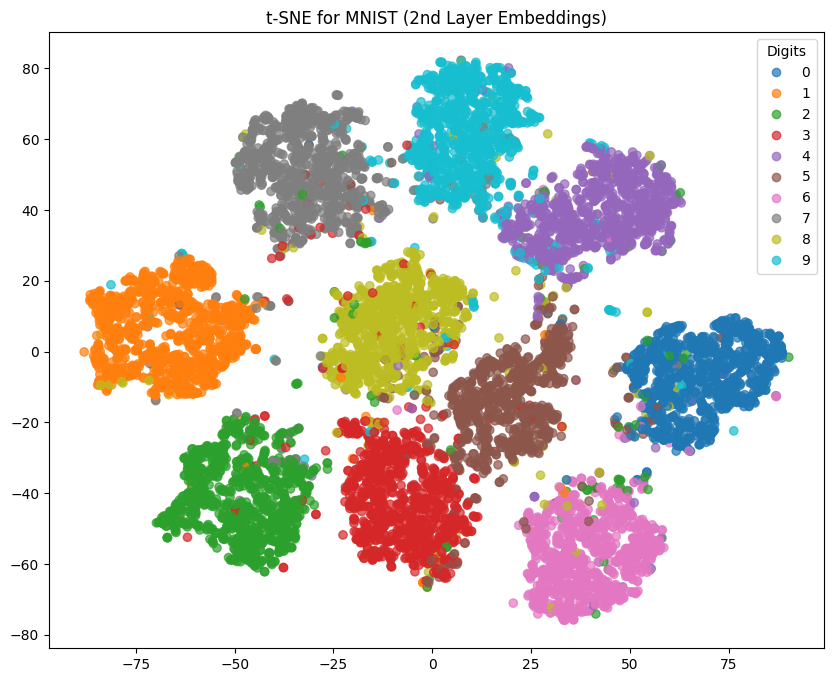

Fashion-MNIST Accuracy: 0.1061
Fashion-MNIST F1 Score: 0.0688


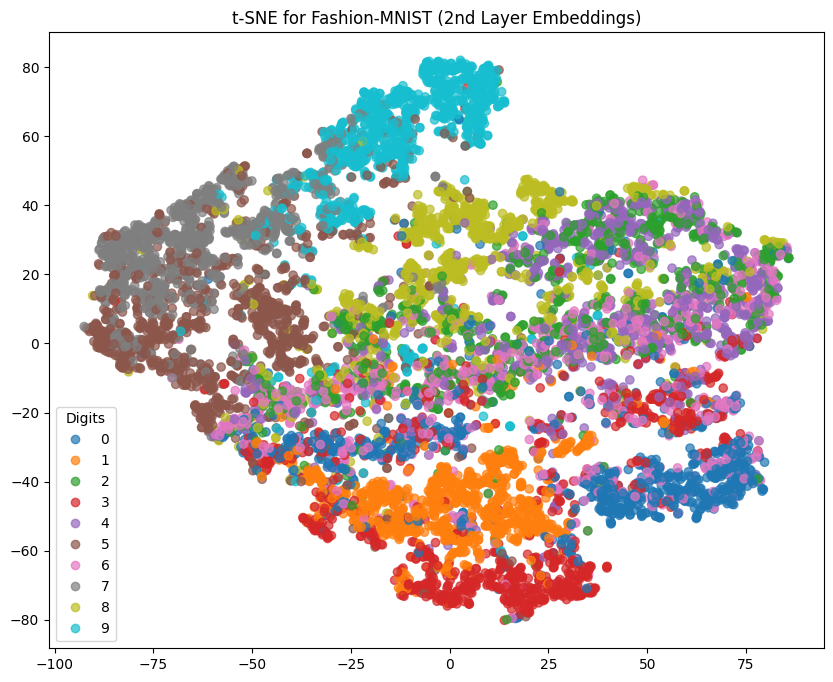

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, f1_score

# Set up device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 1. Load the MNIST and Fashion-MNIST datasets
transform = transforms.ToTensor()

# Load MNIST dataset
mnist_trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
mnist_trainloader = torch.utils.data.DataLoader(mnist_trainset, batch_size=64, shuffle=True)
mnist_testloader = torch.utils.data.DataLoader(mnist_testset, batch_size=64, shuffle=False)

# Load Fashion-MNIST dataset
fashion_testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
fashion_testloader = torch.utils.data.DataLoader(fashion_testset, batch_size=64, shuffle=False)

# 2. Define the MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 30)
        self.fc2 = nn.Linear(30, 100)
        self.fc3 = nn.Linear(100, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the image
        x = torch.relu(self.fc1(x))
        x_hidden = torch.relu(self.fc2(x))  # Second layer output for t-SNE
        output = self.fc3(x_hidden)
        return output, x_hidden

# 3. Instantiate the model, define loss and optimizer
model = MLP().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 4. Train the model on MNIST
def train(model, trainloader, optimizer, criterion, epochs=15):
    model.train()
    for epoch in range(epochs):
        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs, _ = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

train(model, mnist_trainloader, optimizer, criterion, epochs=15)

# 5. Function to evaluate model and calculate accuracy and F1-score
def evaluate_model(model, dataloader, title):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            outputs, _ = model(inputs)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.numpy())

    # Calculate accuracy and F1-score
    accuracy = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average='weighted')
    print(f"{title} Accuracy: {accuracy:.4f}")
    print(f"{title} F1 Score: {f1:.4f}")
    return all_preds, all_labels

# Evaluate on MNIST
mnist_preds, mnist_labels = evaluate_model(model, mnist_testloader, "MNIST")

# 6. Extract hidden layer representations for MNIST for t-SNE visualization
def get_hidden_representations(model, dataloader):
    model.eval()
    hidden_reps = []
    labels_list = []
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            _, hidden_output = model(inputs)
            hidden_reps.append(hidden_output.cpu())
            labels_list.append(labels)
    return torch.cat(hidden_reps), torch.cat(labels_list)

# Get MNIST hidden representations
mnist_hidden, mnist_labels = get_hidden_representations(model, mnist_testloader)

# 7. Plot t-SNE for MNIST second layer embeddings
def plot_tsne(hidden_representations, labels, title):
    tsne = TSNE(n_components=2, random_state=0)
    tsne_result = tsne.fit_transform(hidden_representations)
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='tab10', alpha=0.7)
    plt.legend(*scatter.legend_elements(), title="Digits")
    plt.title(title)
    plt.show()

# Plot t-SNE for MNIST
plot_tsne(mnist_hidden.numpy(), mnist_labels.numpy(), 't-SNE for MNIST (2nd Layer Embeddings)')

# 8. Predict on Fashion-MNIST using the MNIST-trained model and evaluate
fashion_preds, fashion_labels = evaluate_model(model, fashion_testloader, "Fashion-MNIST")

# 9. Extract hidden layer representations for Fashion-MNIST for t-SNE visualization
fashion_hidden, _ = get_hidden_representations(model, fashion_testloader)

# Plot t-SNE for Fashion-MNIST second layer embeddings
plot_tsne(fashion_hidden.numpy(), fashion_labels, 't-SNE for Fashion-MNIST (2nd Layer Embeddings)')


MNIST Accuracy: 0.9443
MNIST F1 Score: 0.9442


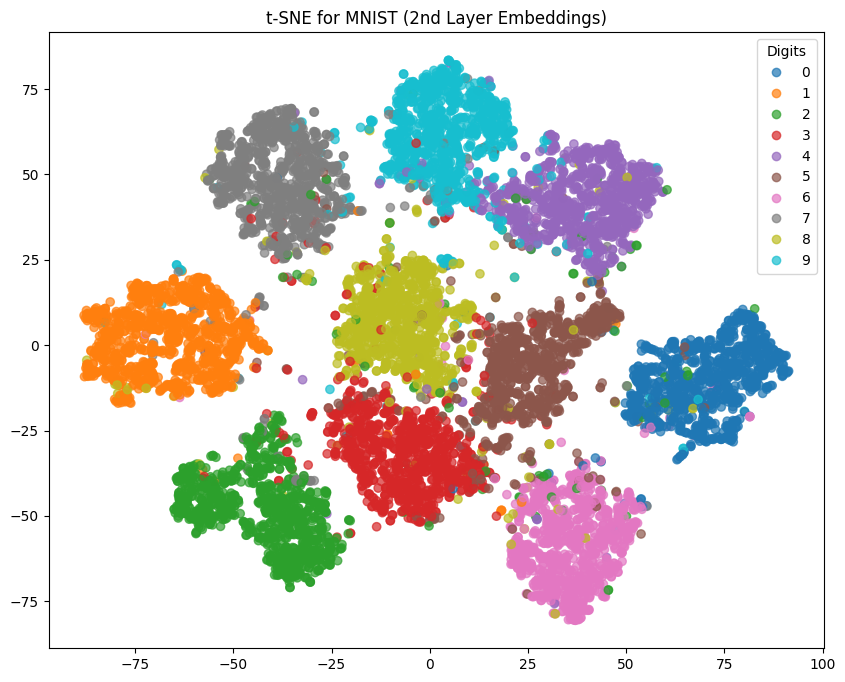

Fashion-MNIST Accuracy: 0.1026
Fashion-MNIST F1 Score: 0.0611


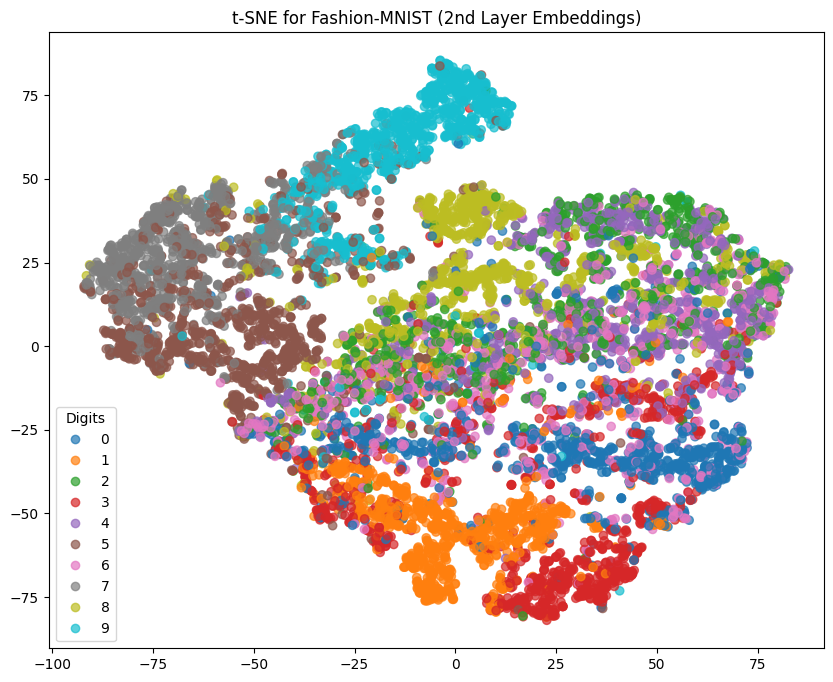

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, f1_score

# Set up device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 1. Load the MNIST and Fashion-MNIST datasets
transform = transforms.ToTensor()

# Load MNIST dataset
mnist_trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
mnist_trainloader = torch.utils.data.DataLoader(mnist_trainset, batch_size=64, shuffle=True)
mnist_testloader = torch.utils.data.DataLoader(mnist_testset, batch_size=64, shuffle=False)

# Load Fashion-MNIST dataset
fashion_testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
fashion_testloader = torch.utils.data.DataLoader(fashion_testset, batch_size=64, shuffle=False)

# 2. Define the MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 30)
        self.fc2 = nn.Linear(30, 150)
        self.fc3 = nn.Linear(150, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the image
        x = torch.relu(self.fc1(x))
        x_hidden = torch.relu(self.fc2(x))  # Second layer output for t-SNE
        output = self.fc3(x_hidden)
        return output, x_hidden

# 3. Instantiate the model, define loss and optimizer
model = MLP().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 4. Train the model on MNIST
def train(model, trainloader, optimizer, criterion, epochs=15):
    model.train()
    for epoch in range(epochs):
        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs, _ = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

train(model, mnist_trainloader, optimizer, criterion, epochs=15)

# 5. Function to evaluate model and calculate accuracy and F1-score
def evaluate_model(model, dataloader, title):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            outputs, _ = model(inputs)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.numpy())

    # Calculate accuracy and F1-score
    accuracy = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average='weighted')
    print(f"{title} Accuracy: {accuracy:.4f}")
    print(f"{title} F1 Score: {f1:.4f}")
    return all_preds, all_labels

# Evaluate on MNIST
mnist_preds, mnist_labels = evaluate_model(model, mnist_testloader, "MNIST")

# 6. Extract hidden layer representations for MNIST for t-SNE visualization
def get_hidden_representations(model, dataloader):
    model.eval()
    hidden_reps = []
    labels_list = []
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            _, hidden_output = model(inputs)
            hidden_reps.append(hidden_output.cpu())
            labels_list.append(labels)
    return torch.cat(hidden_reps), torch.cat(labels_list)

# Get MNIST hidden representations
mnist_hidden, mnist_labels = get_hidden_representations(model, mnist_testloader)

# 7. Plot t-SNE for MNIST second layer embeddings
def plot_tsne(hidden_representations, labels, title):
    tsne = TSNE(n_components=2, random_state=0)
    tsne_result = tsne.fit_transform(hidden_representations)
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='tab10', alpha=0.7)
    plt.legend(*scatter.legend_elements(), title="Digits")
    plt.title(title)
    plt.show()

# Plot t-SNE for MNIST
plot_tsne(mnist_hidden.numpy(), mnist_labels.numpy(), 't-SNE for MNIST (2nd Layer Embeddings)')

# 8. Predict on Fashion-MNIST using the MNIST-trained model and evaluate
fashion_preds, fashion_labels = evaluate_model(model, fashion_testloader, "Fashion-MNIST")

# 9. Extract hidden layer representations for Fashion-MNIST for t-SNE visualization
fashion_hidden, _ = get_hidden_representations(model, fashion_testloader)

# Plot t-SNE for Fashion-MNIST second layer embeddings
plot_tsne(fashion_hidden.numpy(), fashion_labels, 't-SNE for Fashion-MNIST (2nd Layer Embeddings)')


MNIST Accuracy: 0.9593
MNIST F1 Score: 0.9592


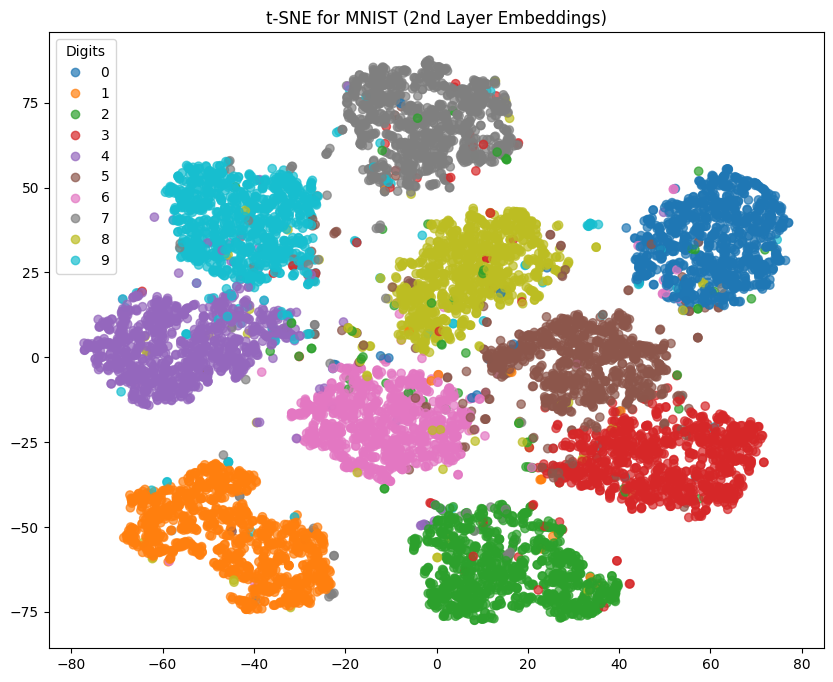

Fashion-MNIST Accuracy: 0.1153
Fashion-MNIST F1 Score: 0.0691


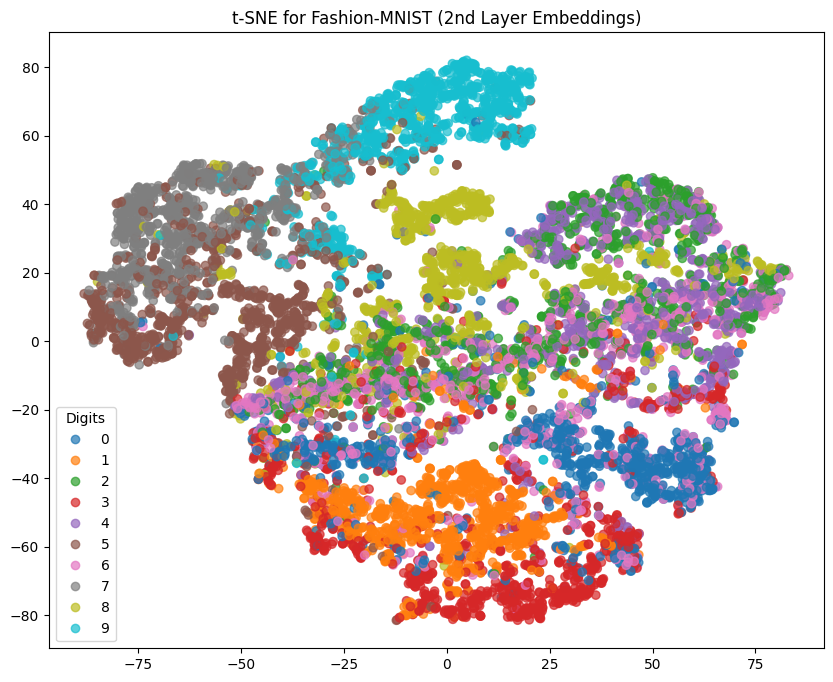

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, f1_score

# Set up device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 1. Load the MNIST and Fashion-MNIST datasets
transform = transforms.ToTensor()

# Load MNIST dataset
mnist_trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
mnist_trainloader = torch.utils.data.DataLoader(mnist_trainset, batch_size=64, shuffle=True)
mnist_testloader = torch.utils.data.DataLoader(mnist_testset, batch_size=64, shuffle=False)

# Load Fashion-MNIST dataset
fashion_testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
fashion_testloader = torch.utils.data.DataLoader(fashion_testset, batch_size=64, shuffle=False)

# 2. Define the MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 30)
        self.fc2 = nn.Linear(30, 200)
        self.fc3 = nn.Linear(200, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the image
        x = torch.relu(self.fc1(x))
        x_hidden = torch.relu(self.fc2(x))  # Second layer output for t-SNE
        output = self.fc3(x_hidden)
        return output, x_hidden

# 3. Instantiate the model, define loss and optimizer
model = MLP().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 4. Train the model on MNIST
def train(model, trainloader, optimizer, criterion, epochs=25):
    model.train()
    for epoch in range(epochs):
        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs, _ = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

train(model, mnist_trainloader, optimizer, criterion, epochs=25)

# 5. Function to evaluate model and calculate accuracy and F1-score
def evaluate_model(model, dataloader, title):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            outputs, _ = model(inputs)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.numpy())

    # Calculate accuracy and F1-score
    accuracy = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average='weighted')
    print(f"{title} Accuracy: {accuracy:.4f}")
    print(f"{title} F1 Score: {f1:.4f}")
    return all_preds, all_labels

# Evaluate on MNIST
mnist_preds, mnist_labels = evaluate_model(model, mnist_testloader, "MNIST")

# 6. Extract hidden layer representations for MNIST for t-SNE visualization
def get_hidden_representations(model, dataloader):
    model.eval()
    hidden_reps = []
    labels_list = []
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            _, hidden_output = model(inputs)
            hidden_reps.append(hidden_output.cpu())
            labels_list.append(labels)
    return torch.cat(hidden_reps), torch.cat(labels_list)

# Get MNIST hidden representations
mnist_hidden, mnist_labels = get_hidden_representations(model, mnist_testloader)

# 7. Plot t-SNE for MNIST second layer embeddings
def plot_tsne(hidden_representations, labels, title):
    tsne = TSNE(n_components=2, random_state=0)
    tsne_result = tsne.fit_transform(hidden_representations)
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='tab10', alpha=0.7)
    plt.legend(*scatter.legend_elements(), title="Digits")
    plt.title(title)
    plt.show()

# Plot t-SNE for MNIST
plot_tsne(mnist_hidden.numpy(), mnist_labels.numpy(), 't-SNE for MNIST (2nd Layer Embeddings)')

# 8. Predict on Fashion-MNIST using the MNIST-trained model and evaluate
fashion_preds, fashion_labels = evaluate_model(model, fashion_testloader, "Fashion-MNIST")

# 9. Extract hidden layer representations for Fashion-MNIST for t-SNE visualization
fashion_hidden, _ = get_hidden_representations(model, fashion_testloader)

# Plot t-SNE for Fashion-MNIST second layer embeddings
plot_tsne(fashion_hidden.numpy(), fashion_labels, 't-SNE for Fashion-MNIST (2nd Layer Embeddings)')


MNIST Accuracy: 0.9470
MNIST F1 Score: 0.9469


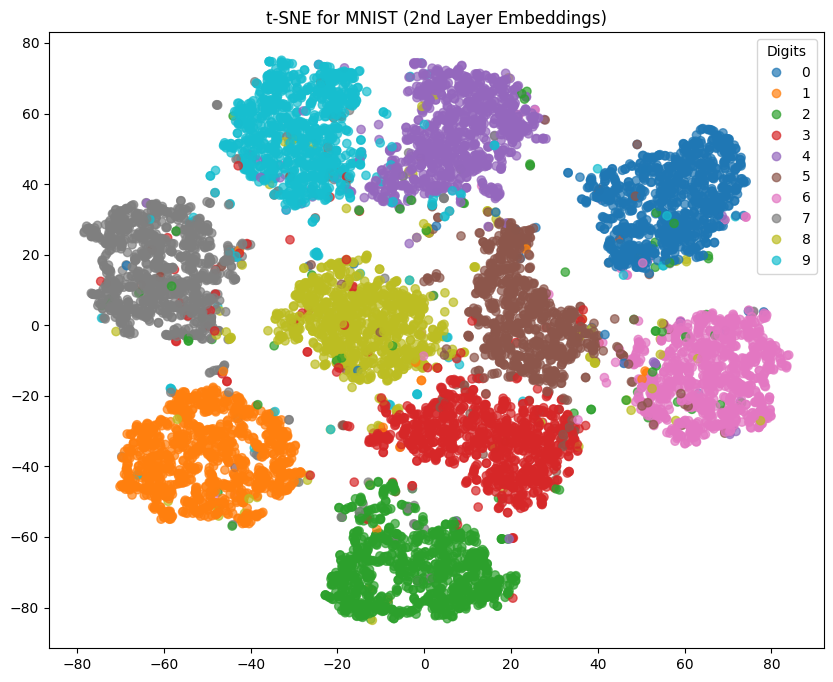

Fashion-MNIST Accuracy: 0.1106
Fashion-MNIST F1 Score: 0.0718


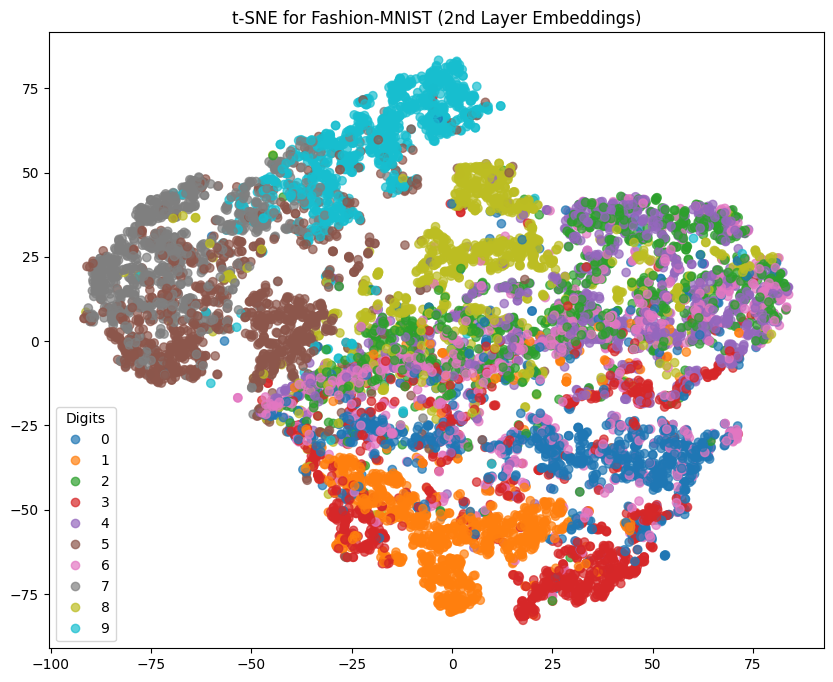

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, f1_score

# Set up device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 1. Load the MNIST and Fashion-MNIST datasets
transform = transforms.ToTensor()

# Load MNIST dataset
mnist_trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
mnist_trainloader = torch.utils.data.DataLoader(mnist_trainset, batch_size=64, shuffle=True)
mnist_testloader = torch.utils.data.DataLoader(mnist_testset, batch_size=64, shuffle=False)

# Load Fashion-MNIST dataset
fashion_testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
fashion_testloader = torch.utils.data.DataLoader(fashion_testset, batch_size=64, shuffle=False)

# 2. Define the MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 30)
        self.fc2 = nn.Linear(30, 400)
        self.fc3 = nn.Linear(400, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the image
        x = torch.relu(self.fc1(x))
        x_hidden = torch.relu(self.fc2(x))  # Second layer output for t-SNE
        output = self.fc3(x_hidden)
        return output, x_hidden

# 3. Instantiate the model, define loss and optimizer
model = MLP().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 4. Train the model on MNIST
def train(model, trainloader, optimizer, criterion, epochs=15):
    model.train()
    for epoch in range(epochs):
        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs, _ = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

train(model, mnist_trainloader, optimizer, criterion, epochs=15)

# 5. Function to evaluate model and calculate accuracy and F1-score
def evaluate_model(model, dataloader, title):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            outputs, _ = model(inputs)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.numpy())

    # Calculate accuracy and F1-score
    accuracy = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average='weighted')
    print(f"{title} Accuracy: {accuracy:.4f}")
    print(f"{title} F1 Score: {f1:.4f}")
    return all_preds, all_labels

# Evaluate on MNIST
mnist_preds, mnist_labels = evaluate_model(model, mnist_testloader, "MNIST")

# 6. Extract hidden layer representations for MNIST for t-SNE visualization
def get_hidden_representations(model, dataloader):
    model.eval()
    hidden_reps = []
    labels_list = []
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            _, hidden_output = model(inputs)
            hidden_reps.append(hidden_output.cpu())
            labels_list.append(labels)
    return torch.cat(hidden_reps), torch.cat(labels_list)

# Get MNIST hidden representations
mnist_hidden, mnist_labels = get_hidden_representations(model, mnist_testloader)

# 7. Plot t-SNE for MNIST second layer embeddings
def plot_tsne(hidden_representations, labels, title):
    tsne = TSNE(n_components=2, random_state=0)
    tsne_result = tsne.fit_transform(hidden_representations)
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='tab10', alpha=0.7)
    plt.legend(*scatter.legend_elements(), title="Digits")
    plt.title(title)
    plt.show()

# Plot t-SNE for MNIST
plot_tsne(mnist_hidden.numpy(), mnist_labels.numpy(), 't-SNE for MNIST (2nd Layer Embeddings)')

# 8. Predict on Fashion-MNIST using the MNIST-trained model and evaluate
fashion_preds, fashion_labels = evaluate_model(model, fashion_testloader, "Fashion-MNIST")

# 9. Extract hidden layer representations for Fashion-MNIST for t-SNE visualization
fashion_hidden, _ = get_hidden_representations(model, fashion_testloader)

# Plot t-SNE for Fashion-MNIST second layer embeddings
plot_tsne(fashion_hidden.numpy(), fashion_labels, 't-SNE for Fashion-MNIST (2nd Layer Embeddings)')


100%|██████████| 26.4M/26.4M [00:01<00:00, 14.7MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 270kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 4.92MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 15.9MB/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



MLP Accuracy: 0.7705


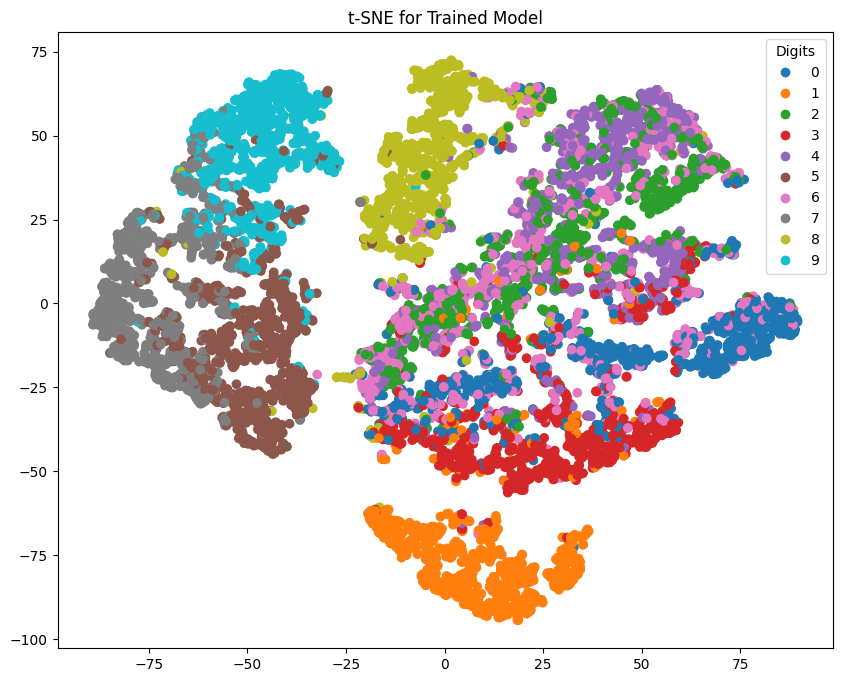

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
transform = transforms.ToTensor()

# Load the Fashion-MNIST training and testing datasets
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                            download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                           download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,

                                         shuffle=False, num_workers=2)
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the image
        x = torch.relu(self.fc1(x))
        x_hidden = torch.relu(self.fc2(x))
        output = self.fc3(x_hidden)
        return output, x_hidden

# 3. Instantiate the model and optimizer
model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# 4. Training the MLP
def train(model, trainloader, optimizer, criterion, epochs=20):
    model.train()
    for epoch in range(epochs):
        for inputs, labels in trainloader:
            optimizer.zero_grad()
            outputs, _ = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

train(model, trainloader, optimizer, criterion, epochs=20)

# 5. Calculate MLP accuracy on test set
mlp_correct = 0
mlp_total = 0
mlp_predictions = []
with torch.no_grad():
    for inputs, labels in testloader:
        outputs, _ = model(inputs)
        _, predicted = torch.max(outputs, 1)
        mlp_predictions.extend(predicted.numpy())
        mlp_total += labels.size(0)
        mlp_correct += (predicted == labels).sum().item()

mlp_accuracy = mlp_correct / mlp_total
print(f"MLP Accuracy: {mlp_accuracy}")

# 6. Get the hidden layer output for t-SNE from the trained model
def get_hidden_representations(model, dataloader):
    model.eval()
    hidden_reps = []
    labels_list = []
    with torch.no_grad():
        for inputs, labels in dataloader:
            _, hidden_output = model(inputs)
            hidden_reps.append(hidden_output)
            labels_list.append(labels)
    return torch.cat(hidden_reps), torch.cat(labels_list)

# Get hidden representations
trained_hidden, labels = get_hidden_representations(model, testloader)

# 7. t-SNE visualization
def plot_tsne(hidden_representations, labels, title):
    tsne = TSNE(n_components=2, random_state=0)
    tsne_result = tsne.fit_transform(hidden_representations)
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='tab10')
    plt.legend(*scatter.legend_elements(), title="Digits")
    plt.title(title)
    plt.show()

# Plot t-SNE for trained model
plot_tsne(trained_hidden.numpy(), labels.numpy(), 't-SNE for Trained Model')


MLP Accuracy: 0.8047


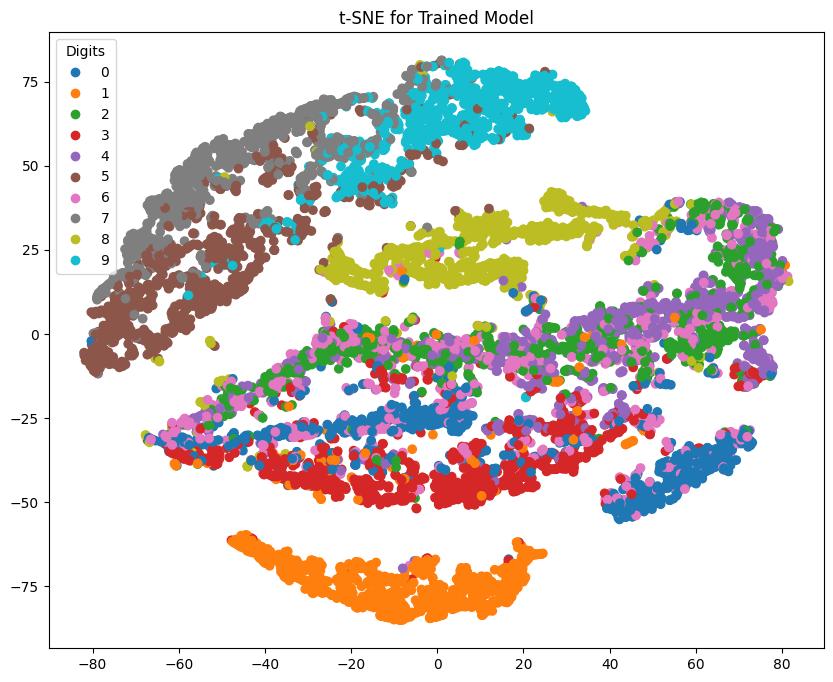

In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 2048)
        self.fc2 = nn.Linear(2048, 1800)
        self.fc3 = nn.Linear(1800, 1000)
        self.fc4 = nn.Linear(1000, 800)
        self.fc5 = nn.Linear(800, 512)
        self.fc6 = nn.Linear(512, 256)
        self.fc7 = nn.Linear( 256,128)
        self.fc8 = nn.Linear( 128,64)
        self.fc9 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the image
        x = torch.relu(self.fc1(x))
        x_hidden = torch.relu(self.fc2(x))
        output = self.fc3(x_hidden)
        return output, x_hidden

# 3. Instantiate the model and optimizer
model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# 4. Training the MLP
def train(model, trainloader, optimizer, criterion, epochs=20):
    model.train()
    for epoch in range(epochs):
        for inputs, labels in trainloader:
            optimizer.zero_grad()
            outputs, _ = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

train(model, trainloader, optimizer, criterion, epochs=20)

# 5. Calculate MLP accuracy on test set
mlp_correct = 0
mlp_total = 0
mlp_predictions = []
with torch.no_grad():
    for inputs, labels in testloader:
        outputs, _ = model(inputs)
        _, predicted = torch.max(outputs, 1)
        mlp_predictions.extend(predicted.numpy())
        mlp_total += labels.size(0)
        mlp_correct += (predicted == labels).sum().item()

mlp_accuracy = mlp_correct / mlp_total
print(f"MLP Accuracy: {mlp_accuracy}")

# 6. Get the hidden layer output for t-SNE from the trained model
def get_hidden_representations(model, dataloader):
    model.eval()
    hidden_reps = []
    labels_list = []
    with torch.no_grad():
        for inputs, labels in dataloader:
            _, hidden_output = model(inputs)
            hidden_reps.append(hidden_output)
            labels_list.append(labels)
    return torch.cat(hidden_reps), torch.cat(labels_list)

# Get hidden representations
trained_hidden, labels = get_hidden_representations(model, testloader)

# 7. t-SNE visualization
def plot_tsne(hidden_representations, labels, title):
    tsne = TSNE(n_components=2, random_state=0)
    tsne_result = tsne.fit_transform(hidden_representations)
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='tab10')
    plt.legend(*scatter.legend_elements(), title="Digits")
    plt.title(title)
    plt.show()

# Plot t-SNE for trained model
plot_tsne(trained_hidden.numpy(), labels.numpy(), 't-SNE for Trained Model')


The Fashion MNIST dataset uses digits to represent different clothing items:

0: T-shirt/top

1: Trouser

2: Pullover

3: Dress

4: Coat

5: Sandal

6: Shirt

7: Sneaker

8: Bag

9: Ankle boot

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
transform = transforms.ToTensor()

# Load the Fashion-MNIST training and testing datasets
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                            download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                           download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,

                                         shuffle=False, num_workers=2)

X_train = trainset.data.numpy().reshape(len(trainset), -1)
y_train = trainset.targets.numpy()
X_test = testset.data.numpy().reshape(len(testset), -1)
y_test = testset.targets.numpy()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MLP F1-score: 0.798430085778435
Random Forest F1-score: 0.876163429262642
Logistic Regression F1-score: 0.8315729297568812


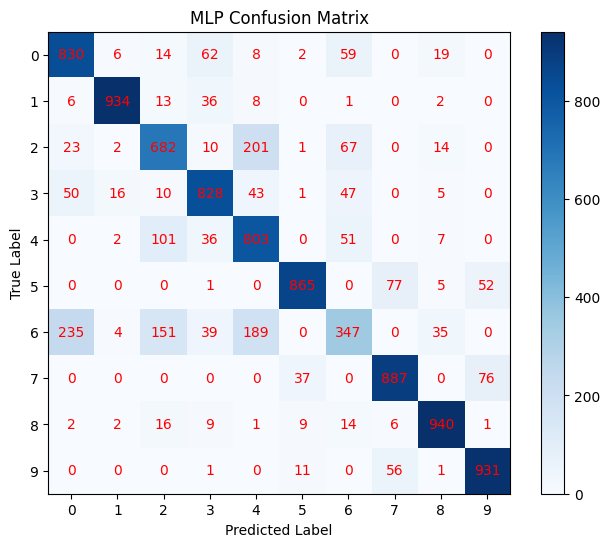

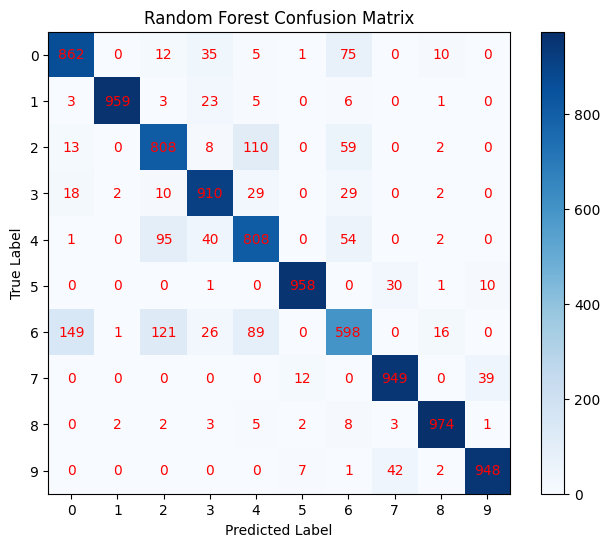

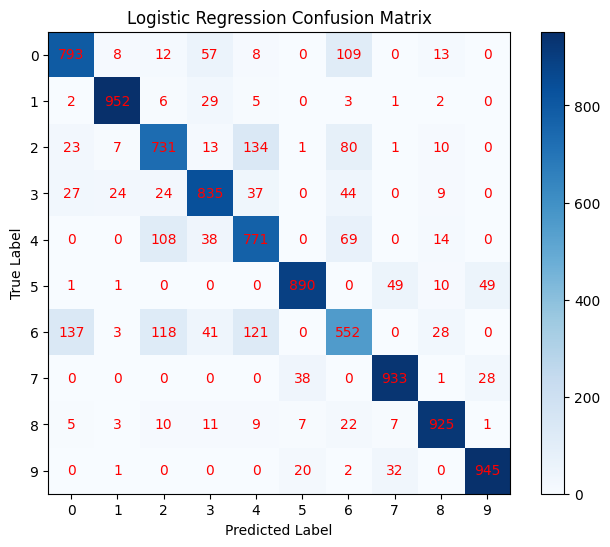

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score
from torch.utils.data import DataLoader

# MLP Model predictions (assuming testloader and model are defined)
mlp_predictions = []
with torch.no_grad():
    for inputs, labels in testloader:
        outputs, _ = model(inputs)
        _, predicted = torch.max(outputs, 1)
        mlp_predictions.extend(predicted.numpy())

# Random Forest Model
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Logistic Regression Model
lr_model = LogisticRegression(random_state=0, max_iter=1000)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Calculate F1-scores
mlp_f1 = f1_score(y_test, mlp_predictions, average='weighted')
rf_f1 = f1_score(y_test, rf_predictions, average='weighted')
lr_f1 = f1_score(y_test, lr_predictions, average='weighted')

# Print F1-scores
print(f"MLP F1-score: {mlp_f1}")
print(f"Random Forest F1-score: {rf_f1}")
print(f"Logistic Regression F1-score: {lr_f1}")

# Function to plot confusion matrix with sample counts in each cell
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(np.unique(y_true)))
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Adding text annotations in each cell
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, f'{cm[i, j]}', ha='center', va='center', color='red')

    plt.show()

# Plotting confusion matrices for each model
plot_confusion_matrix(y_test, mlp_predictions, 'MLP Confusion Matrix')
plot_confusion_matrix(y_test, rf_predictions, 'Random Forest Confusion Matrix')
plot_confusion_matrix(y_test, lr_predictions, 'Logistic Regression Confusion Matrix')


The t-SNE visualization for Fashion-MNIST might show less distinct or more overlapping clusters compared to MNIST because the trained MLP model is specifically optimized for recognizing handwritten digits and might not generalize well to different types of images like clothing items in Fashion-MNIST.

The embedding visualization for the second layer reflects the model's ability to extract relevant features from the input data.
**For MNIST, the model has learned features that effectively separate the digits, resulting in well-separated clusters in the t-SNE plot.
For Fashion-MNIST, the model struggles to extract relevant features using the knowledge it gained from MNIST, leading to overlapping or less organized clusters in the t-SNE plot** one of the reason could be Fashion-MNIST images have different features compared to MNIST digits. The model, trained on MNIST features, might not be able to extract relevant features from Fashion-MNIST images effectively
